In [1]:
# Load necessary packages
library(tidyverse) 

# Load the data in R
players <- read.csv("../input/commonwealth-games-2022/commonwealth games 2022 - players participated.csv")
winners <- read.csv("../input/commonwealth-games-2022/commonwealth games 2022 - players won medals in cwg games 2022.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Check the structure of players
str(players)
# Check the structure of winners
str(winners)
# Get summary of players
summary(players)
# Get summary of winners
summary(winners)

'data.frame':	4533 obs. of  5 variables:
 $ ATHLETE.NAME: chr  "GregHire" "Daniel Geoffrey CraigJohnson" "LaurenMansfield" "LaurenScherf" ...
 $ SPORT       : chr  "3x3 Basketball" "3x3 Basketball" "3x3 Basketball" "3x3 Basketball" ...
 $ GENDER      : chr  "Male" "Male" "Female" "Female" ...
 $ AGE         : int  34 34 32 26 36 28 28 33 21 22 ...
 $ TEAM        : chr  "Australia" "Australia" "Australia" "Australia" ...
'data.frame':	1558 obs. of  6 variables:
 $ ATHLETE.NAME: chr  "Greg Hire" "Daniel Geoffrey Craig Johnson" "Lauren Mansfield" "Lauren Scherf" ...
 $ TEAM        : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ SPORT       : chr  "3x3 Basketball" "3x3 Basketball" "3x3 Basketball" "3x3 Basketball" ...
 $ EVENT       : chr  "Men" "Men" "Women" "Women" ...
 $ MEDAL       : chr  "S" "S" "B" "B" ...
 $ CONTINENT   : chr  "Australia& Oceania" "Australia& Oceania" "Australia& Oceania" "Australia& Oceania" ...


 ATHLETE.NAME          SPORT              GENDER               AGE       
 Length:4533        Length:4533        Length:4533        Min.   : 0.00  
 Class :character   Class :character   Class :character   1st Qu.:22.00  
 Mode  :character   Mode  :character   Mode  :character   Median :25.00  
                                                          Mean   :26.42  
                                                          3rd Qu.:29.00  
                                                          Max.   :75.00  
                                                          NA's   :1      
     TEAM          
 Length:4533       
 Class :character  
 Mode  :character  
                   
                   
                   
                   

 ATHLETE.NAME           TEAM              SPORT              EVENT          
 Length:1558        Length:1558        Length:1558        Length:1558       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    MEDAL            CONTINENT        
 Length:1558        Length:1558       
 Class :character   Class :character  
 Mode  :character   Mode  :character  

# Data Cleaning
* Column names are all caps
* Change medal attrbute in winners df to ordinal variable
* In age attribute of players df, a value is missing
* In age attribute of players df, minimum value is zero
* In some cases athlete.name have spaces between the names, and in come cases not

In [3]:
# column names to lower case
names(players) <- tolower(names(players)) 
names(winners) <- tolower(names(winners))

# Setting orders for medal
winners$medal <- factor(winners$medal, order = TRUE, levels = c("G", "S", "B"))

# Find the player with NA value in age column
players %>% 
  filter(is.na(players$age))

athlete.name,sport,gender,age,team
<chr>,<chr>,<chr>,<int>,<chr>
FelicityCradick,Triathlon and Para Triathlon,Female,NA,Australia


In [4]:
# The age is missing for Felicity Cradick. Add the correct age, which is 20.
players$age[players$athlete.name == "FelicityCradick"] <- 20

# Find the player with '0' in age column
players %>% 
  filter(players$age == 0)

athlete.name,sport,gender,age,team
<chr>,<chr>,<chr>,<dbl>,<chr>
AnthonyPesela,Athletics and Para Athletics,Male,0,Botswana


In [5]:
# Actual age is zero for Anthony Pesela. Add the correct age, which is 20.
players$age[players$athlete.name == "AnthonyPesela"] <- 20

# Remove white space from athlete.name
players$athlete.name <- gsub(" ", "", players$athlete.name)
winners$athlete.name <- gsub(" ", "", winners$athlete.name)

# Arrange by athlete.name
players <- players %>% 
  arrange(athlete.name)

winners <- winners %>% 
  arrange(athlete.name)

head(players,10)
head(winners,10)

,athlete.name,sport,gender,age,team
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,.ManpreetKaur,Para Powerlifting,Female,35,India
2,.ParmjeetKumar,Para Powerlifting,Male,30,India
3,.Sudhir,Para Powerlifting,Male,27,India
4,AakarshiKashyap,Badminton,Female,20,India
5,AaliyahAlleyne,Cricket T20,Female,27,Barbados
6,AaliyahPalestrini,Aquatics - Swimming and Para Swimming,Female,18,Seychelles
7,AaliyahWilliams,Cricket T20,Female,24,Barbados
8,AaronBowen,Boxing,Male,23,England
9,AaronDromoTamakloe,Badminton,Male,27,Ghana


,athlete.name,team,sport,event,medal,continent
,<chr>,<chr>,<chr>,<chr>,<ord>,<chr>
1,.Sudhir,India,Para Powerlifting,Men's Heavyweight,G,Asia
2,AakarshiKashyap,India,Badminton,Mixed Team Event,S,Asia
3,AaronBowen,England,Boxing,Men’s Over 75kg-80kg (Light Heavyweight),B,Europe
4,AaronGate,New Zealand,Cycling - Road,Men's Road Race,G,Australia& Oceania
5,AaronGate,New Zealand,Cycling - Track and Para Track,Men's 4000m Individual Pursuit,G,Australia& Oceania
6,AaronGate,New Zealand,Cycling - Track and Para Track,Men's 40km Points Race,G,Australia& Oceania
7,AaronGate,New Zealand,Cycling - Track and Para Track,Men's 4000m Team Pursuit,G,Australia& Oceania
8,AaronWilson,Australia,Lawn Bowls and Para Lawn Bowls,Men's Singles,G,Australia& Oceania
9,AbbeyCaldwell,Australia,Athletics and Para Athletics,Women's 1500m,B,Australia& Oceania


In [6]:
# Some names have '.' at the start. Correct the names 
players$athlete.name[players$athlete.name == ".Sudhir"] <- "Sudhir"
players$athlete.name[players$athlete.name == ".ParmjeetKumar"] <- "ParmjeetKumar"
players$athlete.name[players$athlete.name == ".ManpreetKaur"] <- "ManpreetKaur"
winners$athlete.name[winners$athlete.name == ".Sudhir"] <- "Sudhir" 

# Some names in 'winners' data frame have the word 'null' at the start. Remove the word null
winners$athlete.name <- gsub("null", "", winners$athlete.name)

# arrange by athlete.name
winners <- winners %>% 
  arrange(athlete.name)

# Data Preparation

In [7]:
# Create a new data frame by joining players and winners
players_02 <- merge(x = players, y = winners , by = c("athlete.name", "team"), all.x = TRUE)

# Remove unwanted columns
players_02 <- subset(players_02, select = -c(continent, event, sport.x, sport.y))



#### Note
The original 'winners' data frame contained 1558 entries for winners.
After merging, 8 entries are missing. These entries are neglected in further analysis.


In [8]:
# Add a column for winners
players_02 <- players_02 %>% 
  mutate(winner = ifelse(is.na(medal), 0, 1))

# Convert players_02$winner to factors
players_02$winner <- as.factor(players_02$winner)

In [9]:
# Create a data frame with only winners
players_ow <- players_02 %>%
  select(athlete.name, team, gender, age, winner) %>% 
  filter(!duplicated(athlete.name) & winner == 1)

# players_02 contains multiple entries for players with more than one medal 
# Create a data frame with single entry for all players

players_ap <- players_02 %>%
  select(athlete.name, team, gender, age, winner) %>% 
  filter(!duplicated(athlete.name))


# Data Visualization

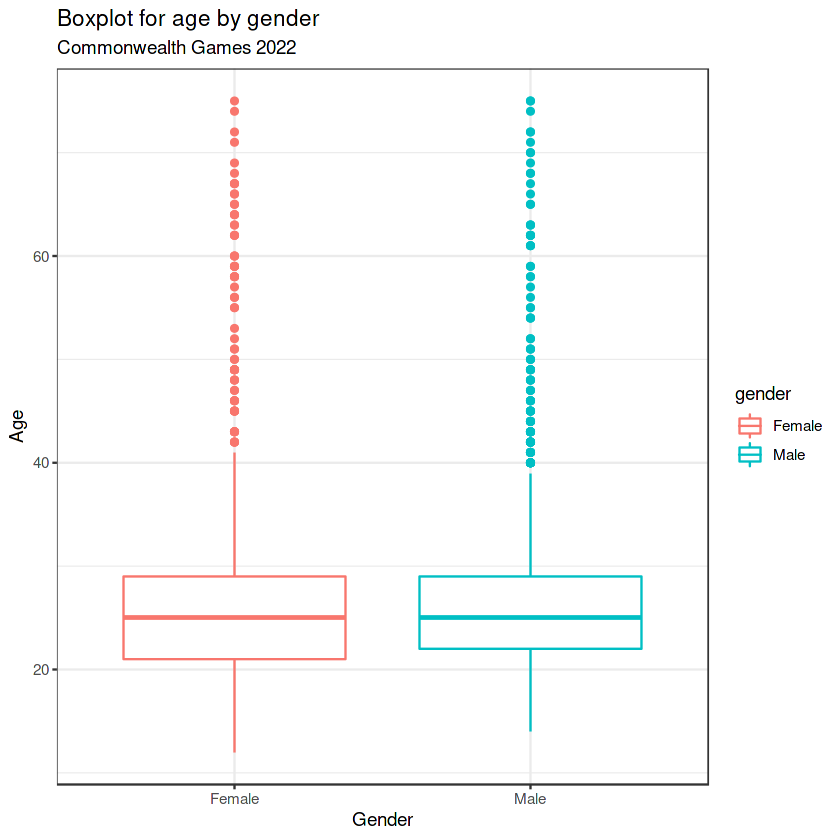

In [10]:
# Boxplot for age by gender
ggplot(data = players_ap, aes(x = gender, y = age, color = gender))+
  theme_bw() +
  geom_boxplot() +
  labs(x = "Gender",
       y = "Age",
       title = "Boxplot for age by gender",
       subtitle = "Commonwealth Games 2022")

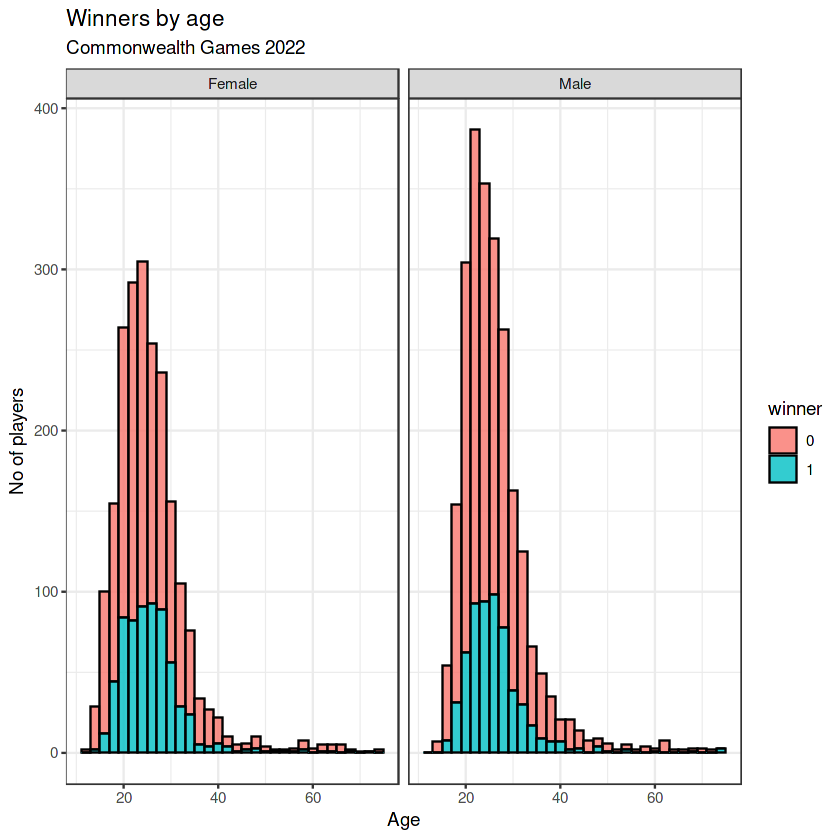

In [11]:
# Histogram for winners by age
ggplot(data = players_ap, aes(x = age, fill = winner))+
  theme_bw() +
  geom_histogram(binwidth = 2, color= "black", alpha = 0.8) +
  facet_wrap(~gender) +
  labs(x = "Age",
       y = "No of players",
       title = "Winners by age",
       subtitle = "Commonwealth Games 2022")

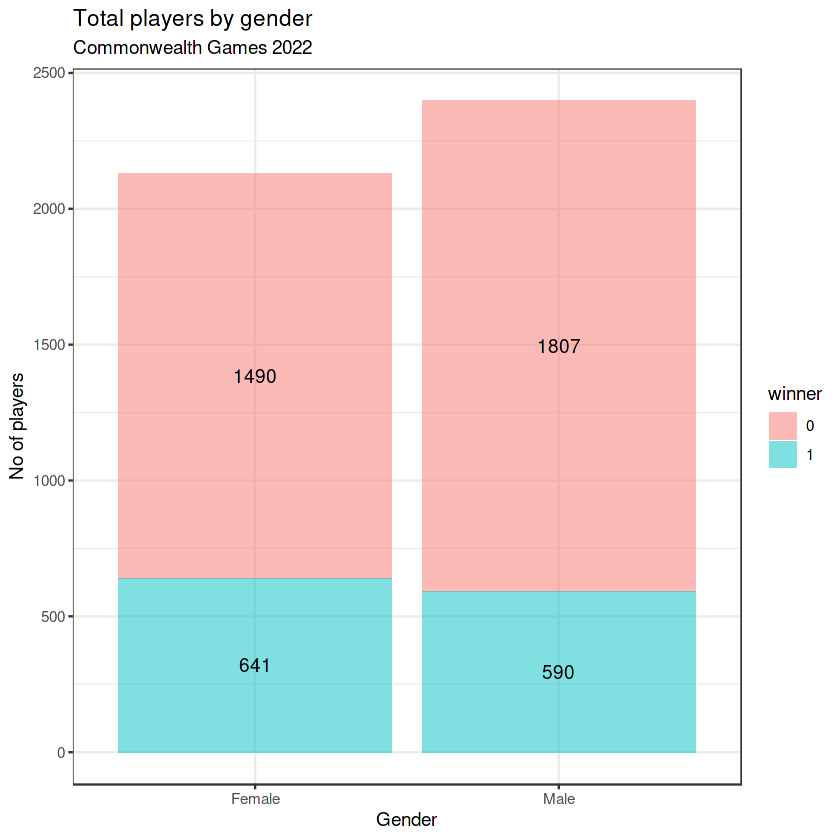

In [12]:
# Bar graph for total players by gender
ggplot(data = players_ap, aes(x = gender, fill = winner))+
  theme_bw() +
  geom_bar(alpha = 0.5) +
  geom_text(stat='count',position = position_stack(vjust = 0.5), aes(label=..count..)) +
  labs(x = "Gender",
       y = "No of players",
       title = "Total players by gender",
       subtitle = "Commonwealth Games 2022")

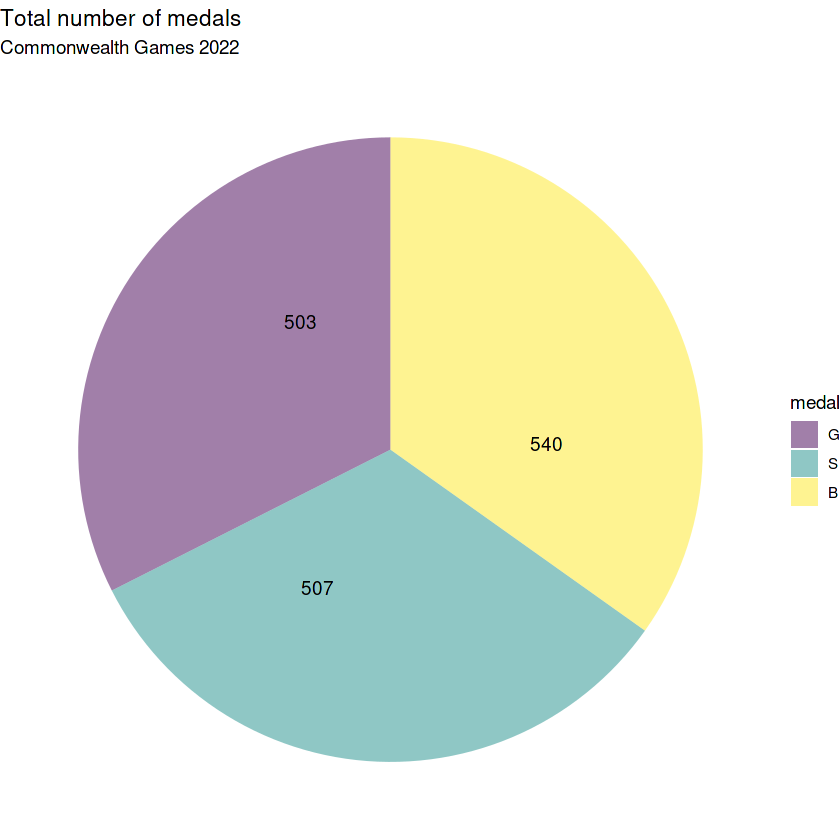

In [13]:
# Pie chart for total number of medals
plot_03 <- players_02 %>% 
  select(medal, winner) %>% 
  filter(winner == 1) %>% 
  group_by(medal) %>% 
  summarise(total_medals = n())

plot_03 %>% 
  ggplot(aes(x = "", y = total_medals, fill = medal, label= total_medals))+
  geom_bar(stat = "identity", alpha = 0.5)+
  geom_text(position = position_stack(vjust = 0.7)) +
  theme_void() +
  labs(title = "Total number of medals",
       subtitle = "Commonwealth Games 2022") +
  coord_polar("y", start=0)

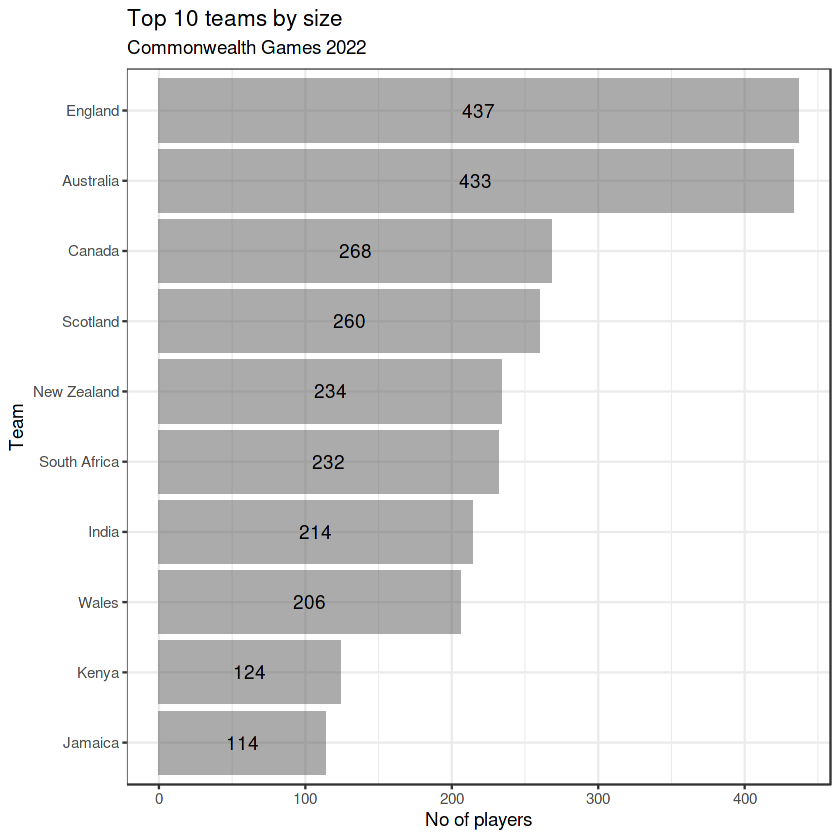

In [14]:
# Bar graph for top 10 teams by size
top_10_by_size <- players %>% 
  group_by(team) %>% 
  summarise(team_size = n()) %>% 
  arrange(-team_size)

top_10_by_size <- head(top_10_by_size, 10)

plot_02 <- players_ap %>%                                 
  select(team, gender, winner) %>%                                 
  group_by(team) %>%                                      
  mutate(total = n()) %>%                                 
  filter(total >= (top_10_by_size$team_size[10]))

plot_02 %>% 
  ggplot(aes(y= reorder(team, total), label = total))+    
  geom_bar(position = position_stack(reverse = TRUE), alpha = 0.5) +
  theme_bw() +
  geom_text(stat='count',position = position_stack(reverse = TRUE, vjust = 0.5), aes(label=..count..)) +
  labs(y = "Team",
       x = "No of players",
       title = "Top 10 teams by size",
       subtitle = "Commonwealth Games 2022") 

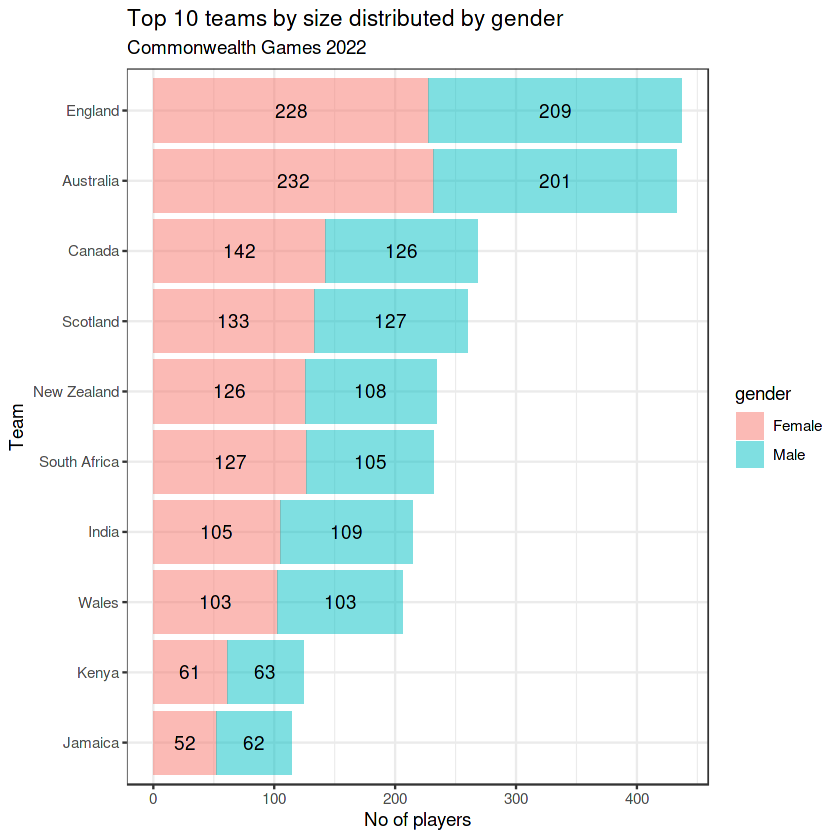

In [15]:
# Bar graph for top 10 teams by size distributed by gender
plot_02 %>% 
  ggplot(aes(y= reorder(team, total), fill = gender, label = total))+    # reorder the graph total
  geom_bar(position = position_stack(reverse = TRUE), alpha = 0.5) +
  theme_bw() +
  geom_text(stat='count',position = position_stack(reverse = TRUE, vjust = 0.5), aes(label=..count..)) +
  labs(y = "Team",
       x = "No of players",
       title = "Top 10 teams by size distributed by gender",
       subtitle = "Commonwealth Games 2022")

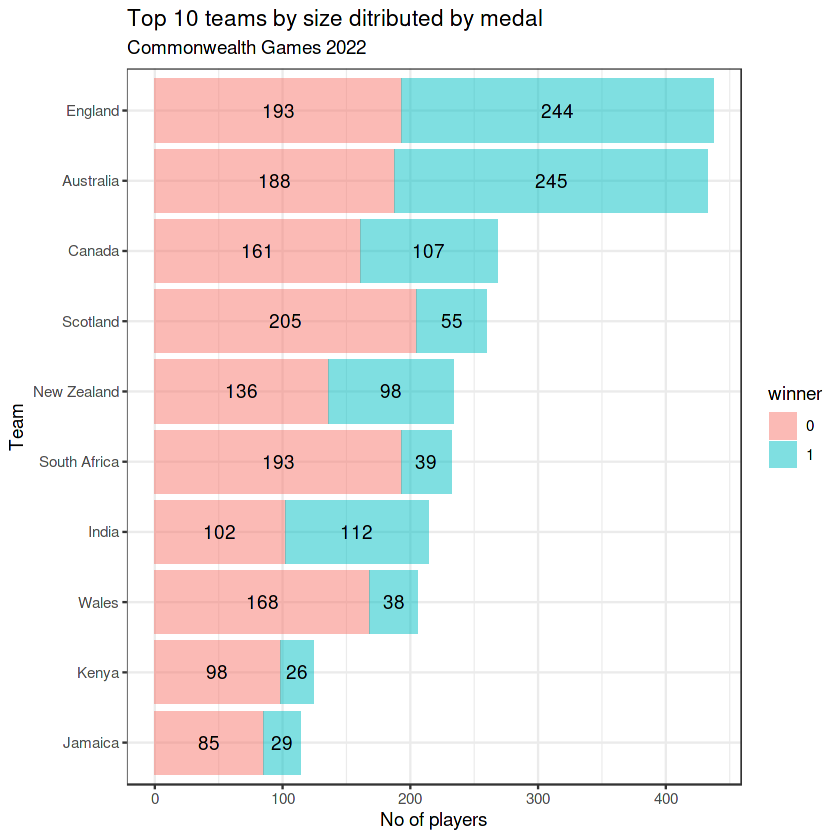

In [16]:
# Bar graph for top 10 teams by size distributed by medal
plot_02 %>% 
  ggplot(aes(y= reorder(team, total), fill = winner, label = total))+    # reorder the graph total
  geom_bar(position = position_stack(reverse = TRUE), alpha = 0.5) +
  theme_bw() +
  geom_text(stat='count',position = position_stack(reverse = TRUE, vjust = 0.5), aes(label=..count..)) +
  labs(y = "Team",
       x = "No of players",
       title = "Top 10 teams by size ditributed by medal",
       subtitle = "Commonwealth Games 2022")

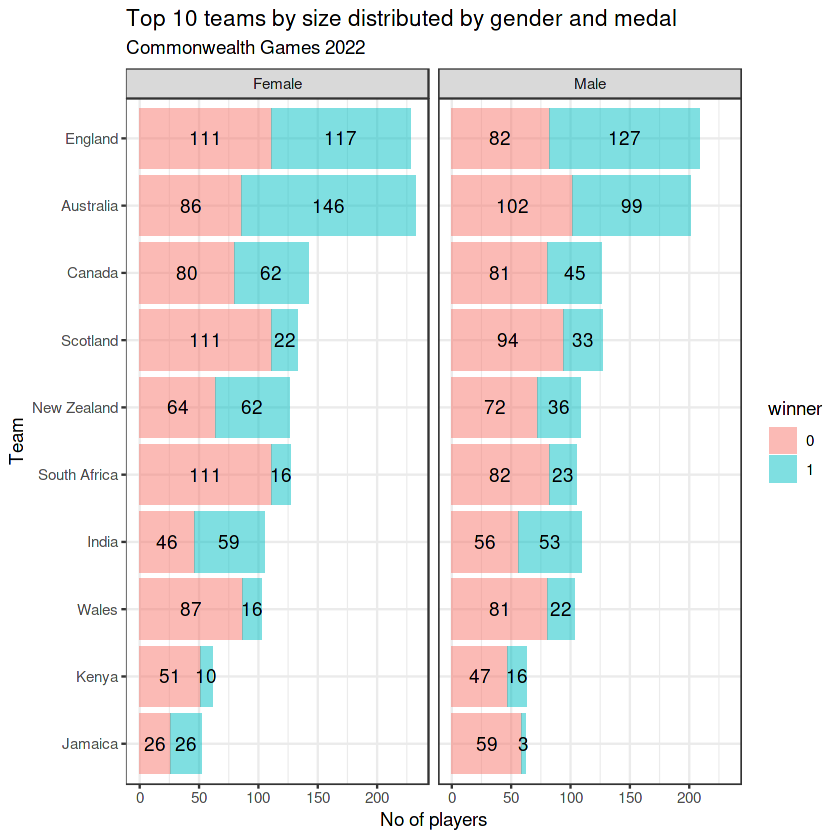

In [17]:
# Bar graph for top 10 teams by size distributed by gender and medal
plot_02 %>% 
  ggplot(aes(y= reorder(team, total), fill = winner, label = total))+    # reorder the graph total
  geom_bar(position = position_stack(reverse = TRUE), alpha = 0.5) +
  theme_bw() +
  geom_text(stat='count',position = position_stack(reverse = TRUE, vjust = 0.5), aes(label=..count..)) +
  labs(y = "Team",
       x = "No of players",
       title = "Top 10 teams by size distributed by gender and medal",
       subtitle = "Commonwealth Games 2022") +
  facet_wrap(~gender)

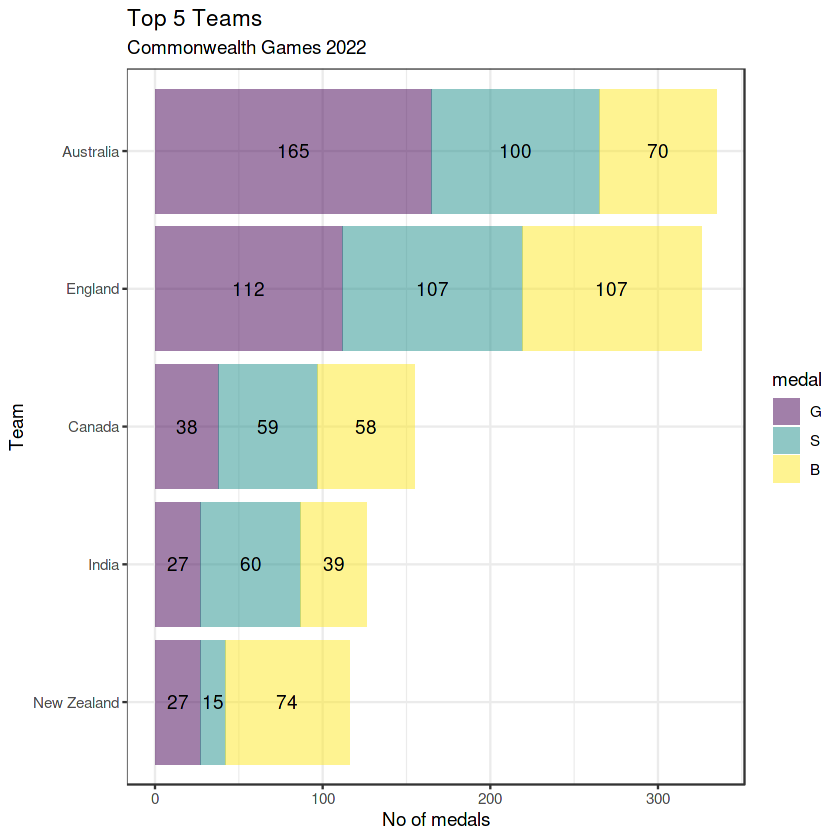

In [18]:
# Bar graph for top 5 teams by number of medals
top_5_by_medals <- winners %>% 
  group_by(team) %>% 
  summarise(total_medals = n()) %>%
  arrange(-total_medals)

top_5_by_medals<- head(top_5_by_medals, 5)
                       
plot_01 <- players_02 %>% 
  filter(winner == 1) %>%                                 # filter only winners
  select(team, medal) %>%                                 # select team and medal column
  group_by(team) %>%                                      # group by team
  mutate(total = n()) %>%                                 # calculate total medals by team
  filter(total >= (top_5_by_medals$total_medals[5]))      # filter top 5 countries
plot_01 %>% 
  ggplot(aes(y= reorder(team, total), fill = medal, label = total))+    # reorder the graph total
  geom_bar(position = position_stack(reverse = TRUE), alpha = 0.5) +
  theme_bw() +
  geom_text(stat='count',position = position_stack(reverse = TRUE, vjust = 0.5), aes(label=..count..)) +
  labs(y = "Team",
       x = "No of medals",
       title = "Top 5 Teams",
       subtitle = "Commonwealth Games 2022")